In [1]:
# !pip install psycopg2-binary

In [2]:
# Importing libraries:

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style('whitegrid')
from sqlalchemy import create_engine, inspect, func
from sqlalchemy import Column, Integer, String, Float
from secret import password

In [3]:
# Setting up variables:

user = "postgres"
host = "localhost"
port = "5432"
db = "PH_emp_db"


In [4]:
# Creating engine:

engine = create_engine(f"postgresql+psycopg2://{user}:{password}@{host}:{port}/{db}")

In [5]:
# Create the inspector and connect it to the engine
inspector = inspect(engine)

In [6]:
# Collect the names of tables within the database
inspector.get_table_names()

['departments', 'dept_manager', 'employees', 'dept_emp', 'salaries', 'titles']

In [7]:
# Listing the data from the required tables for analysis:

# Table 1 : titles

sql1 = "SELECT * FROM titles"
list(engine.execute(sql1))

[(10001, 'Senior Engineer', datetime.date(1986, 6, 26), datetime.date(9999, 1, 1)),
 (10002, 'Staff', datetime.date(1996, 8, 3), datetime.date(9999, 1, 1)),
 (10003, 'Senior Engineer', datetime.date(1995, 12, 3), datetime.date(9999, 1, 1)),
 (10004, 'Engineer', datetime.date(1986, 12, 1), datetime.date(1995, 12, 1)),
 (10004, 'Senior Engineer', datetime.date(1995, 12, 1), datetime.date(9999, 1, 1)),
 (10005, 'Senior Staff', datetime.date(1996, 9, 12), datetime.date(9999, 1, 1)),
 (10005, 'Staff', datetime.date(1989, 9, 12), datetime.date(1996, 9, 12)),
 (10006, 'Senior Engineer', datetime.date(1990, 8, 5), datetime.date(9999, 1, 1)),
 (10007, 'Senior Staff', datetime.date(1996, 2, 11), datetime.date(9999, 1, 1)),
 (10007, 'Staff', datetime.date(1989, 2, 10), datetime.date(1996, 2, 11)),
 (10008, 'Assistant Engineer', datetime.date(1998, 3, 11), datetime.date(2000, 7, 31)),
 (10009, 'Assistant Engineer', datetime.date(1985, 2, 18), datetime.date(1990, 2, 18)),
 (10009, 'Engineer', datet

In [8]:
#Table 2 : employees

sql2 = "SELECT * FROM employees"
list(engine.execute(sql2))

[(10001, datetime.date(1953, 9, 2), 'Georgi', 'Facello', 'M', datetime.date(1986, 6, 26)),
 (10002, datetime.date(1964, 6, 2), 'Bezalel', 'Simmel', 'F', datetime.date(1985, 11, 21)),
 (10003, datetime.date(1959, 12, 3), 'Parto', 'Bamford', 'M', datetime.date(1986, 8, 28)),
 (10004, datetime.date(1954, 5, 1), 'Chirstian', 'Koblick', 'M', datetime.date(1986, 12, 1)),
 (10005, datetime.date(1955, 1, 21), 'Kyoichi', 'Maliniak', 'M', datetime.date(1989, 9, 12)),
 (10006, datetime.date(1953, 4, 20), 'Anneke', 'Preusig', 'F', datetime.date(1989, 6, 2)),
 (10007, datetime.date(1957, 5, 23), 'Tzvetan', 'Zielinski', 'F', datetime.date(1989, 2, 10)),
 (10008, datetime.date(1958, 2, 19), 'Saniya', 'Kalloufi', 'M', datetime.date(1994, 9, 15)),
 (10009, datetime.date(1952, 4, 19), 'Sumant', 'Peac', 'F', datetime.date(1985, 2, 18)),
 (10010, datetime.date(1963, 6, 1), 'Duangkaew', 'Piveteau', 'F', datetime.date(1989, 8, 24)),
 (10011, datetime.date(1953, 11, 7), 'Mary', 'Sluis', 'F', datetime.date(19

In [9]:
#Table 2 : salaries

sql3 = "SELECT * FROM salaries"
list(engine.execute(sql3))

[(10001, '$60,117.00', datetime.date(1986, 6, 26), datetime.date(1987, 6, 26)),
 (10002, '$65,828.00', datetime.date(1996, 8, 3), datetime.date(1997, 8, 3)),
 (10003, '$40,006.00', datetime.date(1995, 12, 3), datetime.date(1996, 12, 2)),
 (10004, '$40,054.00', datetime.date(1986, 12, 1), datetime.date(1987, 12, 1)),
 (10005, '$78,228.00', datetime.date(1989, 9, 12), datetime.date(1990, 9, 12)),
 (10006, '$40,000.00', datetime.date(1990, 8, 5), datetime.date(1991, 8, 5)),
 (10007, '$56,724.00', datetime.date(1989, 2, 10), datetime.date(1990, 2, 10)),
 (10008, '$46,671.00', datetime.date(1998, 3, 11), datetime.date(1999, 3, 11)),
 (10009, '$60,929.00', datetime.date(1985, 2, 18), datetime.date(1986, 2, 18)),
 (10010, '$72,488.00', datetime.date(1996, 11, 24), datetime.date(1997, 11, 24)),
 (10011, '$42,365.00', datetime.date(1990, 1, 22), datetime.date(1991, 1, 22)),
 (10012, '$40,000.00', datetime.date(1992, 12, 18), datetime.date(1993, 12, 18)),
 (10013, '$40,000.00', datetime.date(198

Creating Dataframes for each table:

In [10]:
df_titles = pd.read_sql(sql1, con=engine)
df_titles.head()

,emp_no,title,from_date,to_date
0,10001,Senior Engineer,1986-06-26,9999-01-01
1,10002,Staff,1996-08-03,9999-01-01
2,10003,Senior Engineer,1995-12-03,9999-01-01
3,10004,Engineer,1986-12-01,1995-12-01
4,10004,Senior Engineer,1995-12-01,9999-01-01


In [11]:
df_employees = pd.read_sql(sql2, con=engine)
df_employees.head()

,emp_no,birth_date,first_name,last_name,gender,hire_date
0,10001,1953-09-02,Georgi,Facello,M,1986-06-26
1,10002,1964-06-02,Bezalel,Simmel,F,1985-11-21
2,10003,1959-12-03,Parto,Bamford,M,1986-08-28
3,10004,1954-05-01,Chirstian,Koblick,M,1986-12-01
4,10005,1955-01-21,Kyoichi,Maliniak,M,1989-09-12


In [12]:
df_salaries = pd.read_sql(sql3, con=engine)
df_salaries.head()

,emp_no,salary,from_date,to_date
0,10001,"$60,117.00",1986-06-26,1987-06-26
1,10002,"$65,828.00",1996-08-03,1997-08-03
2,10003,"$40,006.00",1995-12-03,1996-12-02
3,10004,"$40,054.00",1986-12-01,1987-12-01
4,10005,"$78,228.00",1989-09-12,1990-09-12


### 2. Create a histogram to visualize the most common salary ranges for employees.

In [13]:
# checking the data types:

df_salaries.dtypes

emp_no        int64
salary       object
from_date    object
to_date      object
dtype: object

In [14]:
# Creating function to clean the currency from the salary column:

def clean_currency(x):
    if isinstance(x, str):
        return(x.replace('$', '').replace(',', ''))
    return(x)

In [15]:
# Applying the function clean_currency and changing the data type to float:

df_salaries['salary'] = df_salaries['salary'].apply(clean_currency).astype('float')
df_salaries

,emp_no,salary,from_date,to_date
0,10001,60117.0,1986-06-26,1987-06-26
1,10002,65828.0,1996-08-03,1997-08-03
2,10003,40006.0,1995-12-03,1996-12-02
3,10004,40054.0,1986-12-01,1987-12-01
4,10005,78228.0,1989-09-12,1990-09-12
...,...,...,...,...
300019,499995,40000.0,1997-06-02,1998-06-02
300020,499996,58058.0,1996-05-13,1997-05-13
300021,499997,49597.0,1987-08-30,1988-08-29
300022,499998,40000.0,1993-12-27,1994-12-27


In [16]:
# df_salaries['salary'].plot(kind='hist', bins=bins)

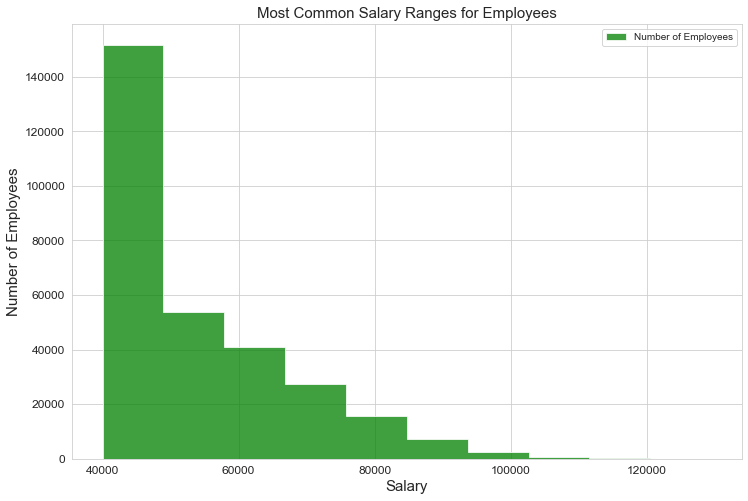

<Figure size 432x288 with 0 Axes>

In [17]:
# Plotting the dataframe df_salaries:

plt.figure(figsize=(12,8))

data = df_salaries['salary']
ax = plt.hist(data,10,facecolor='green',alpha=0.75, align='mid',histtype = 'stepfilled')

plt.xlabel('Salary',fontsize=15)
plt.xticks(fontsize=12)
plt.ylabel('Number of Employees',fontsize=15)
plt.yticks(fontsize=12)
plt.title('Most Common Salary Ranges for Employees', fontsize=15)
plt.legend(['Number of Employees'])
plt.grid(True)
plt.show()
plt.savefig('Most Common Salary Ranges for Employees.png')

#### The most common salary range is between '40,000.00 - 50,000.00' with number of employees above 150,000.

In [18]:
# Dropping off the unnecessary columns from Salaries table:

df_salaries_rev = df_salaries.drop(['from_date', 'to_date'], axis=1)
df_salaries_rev

,emp_no,salary
0,10001,60117.0
1,10002,65828.0
2,10003,40006.0
3,10004,40054.0
4,10005,78228.0
...,...,...
300019,499995,40000.0
300020,499996,58058.0
300021,499997,49597.0
300022,499998,40000.0


In [19]:
# Dropping off the unnecessary columns from titles table:

df_titles_rev = df_titles.drop(['from_date', 'to_date'], axis=1)
df_titles_rev

,emp_no,title
0,10001,Senior Engineer
1,10002,Staff
2,10003,Senior Engineer
3,10004,Engineer
4,10004,Senior Engineer
...,...,...
443303,499997,Engineer
443304,499997,Senior Engineer
443305,499998,Senior Staff
443306,499998,Staff


### 3. Create a bar chart of average salary by title.


In [20]:
# merging titles table with salaries:

df_merged = pd.merge (df_titles_rev, df_salaries_rev, how='inner', on='emp_no')
df_merged

,emp_no,title,salary
0,10001,Senior Engineer,60117.0
1,10002,Staff,65828.0
2,10003,Senior Engineer,40006.0
3,10004,Engineer,40054.0
4,10004,Senior Engineer,40054.0
...,...,...,...
443303,499997,Engineer,49597.0
443304,499997,Senior Engineer,49597.0
443305,499998,Senior Staff,40000.0
443306,499998,Staff,40000.0


In [21]:
# Creating a new dataframe: Grouping by title column to calculate average salary for each title:

new_df=df_merged.groupby(['title'])['salary'].mean().sort_values().reset_index(name='average_salary')
new_df

,title,average_salary
0,Assistant Engineer,48493.204786
1,Senior Engineer,48506.751806
2,Engineer,48539.781423
3,Technique Leader,48580.505772
4,Manager,51531.041667
5,Staff,58465.271904
6,Senior Staff,58503.286614


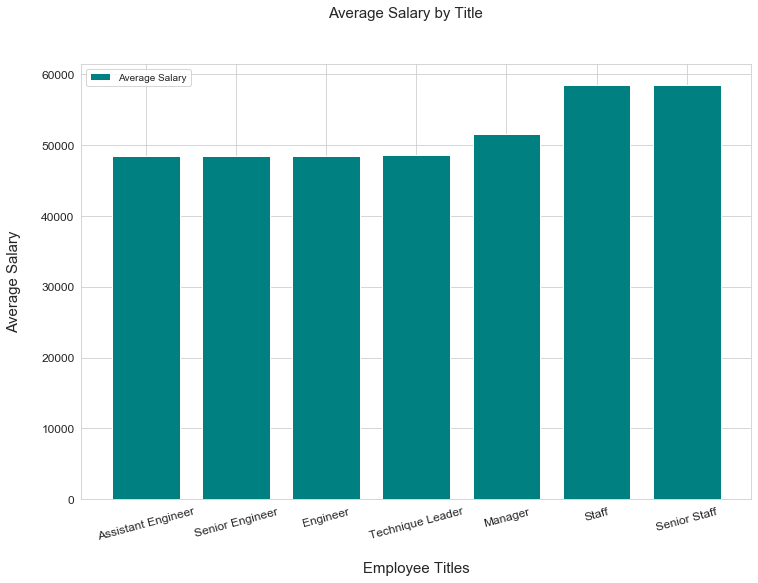

In [22]:
# Plotting the dataframe new_df:

plt.figure(figsize = (12,8))

x_axis = new_df['title']
ax1 = plt.bar(x_axis,new_df['average_salary'] ,facecolor="teal", width=0.75)
labels= ["Assistant Engineer", "Senior Engineer","Engineer", "Technique Leader", "Manager", "Staff", 
         "Senior Staff"]

plt.grid(True)
plt.xticks(labels, fontsize=12, rotation=15)
plt.yticks(fontsize=12)
plt.legend(['Average Salary'])
plt.xlabel("Employee Titles", labelpad=20, size=15)
plt.ylabel("Average Salary", labelpad=20, size=15)
plt.suptitle("Average Salary by Title", size=15)
plt.savefig("Average Salary by Title.png")
plt.show()

#### As we can see, the average salary for 'Senior Staff' is the highest at 58503.29. The average salary for titles 'Assistant Engineer', 'Senior Engineer', 'Engineer', and 'Technique Leader' is almost the same. This could be because we dont have the salary information of all employees for all timeframes. Thus when merging the files, for example for emp_no 10004 - it assigns 40000 to both the employees titles i.e Engineer and Senior Engineer. The data seems to incorrect and missing information. 